# Dense
- All you have to do is mark every k pixels in the image as keypoint.
- Used in natural scene images such as beaches, mountain ranges, fields of grass where standard corner and blob based detections do not perform as well. 
- Drawback: 
    - Oversample the image, meaning too many keypoints are detected. 
    - The more keypoints are detected, the more descriptors have to be computed.
    - The more descriptors are computed
        - Longer the description process will take
        - More storage space it shall occupy
    - Not inherently scale invariant

## How it works.
- Marks every k pixels in the image as a keypoint
- If we increase the spacing parameter, i.e, distance between each keypoint, we detect fewer pixels. 
- According to [work](https://gurus.pyimagesearch.com/wp-content/uploads/2015/06/feifei_2005.pdf) by Fei-Fei Li, marking every k pixels as keypoints leads tends to outperform other keypoint detectors like FAST, Harris, DoD, etc.
- To make it scale invariant, we extract Dense Keypoints with varying radii.
- Often excellent for tasks such as image classification via machine learning and content-based image retrieval

In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import cv2
import imutils
from cv_imshow import display_image, create_subplot

In [7]:
args = {
    "image":"../../images/fast_book_cover.png",
    "pen":"../../images/keypoint_detect/pen.jpg",
    "step":6,
    "size":1
}

In [4]:
def dense(image, step, radius):
    #init list of keypoints
    kps = []
    
    #loop over h and w of image, taking a step in each dir
    for x in range(0, image.shape[1], step):
        for y in range(0, image.shape[0], step):
            #create keypoint and append to kps
            kps.append(cv2.KeyPoint(x,y,radius))
    
    return kps

In [11]:
def keypoint_detect(imagePath, step, size):
    image = cv2.imread(imagePath)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #get dense keypoints
    kps = dense(gray, step, size/2)
    
    #explicitly adjust the keypoint size
    for kp in kps:
        kp.size = size
    
    #draw keypoints
    for kp in kps:
        r = int(0.5*kp.size)
        (x,y) = np.int0(kp.pt)
        cv2.circle(image, (x,y), r, (0,255,255), 2)
    
    display_image("Images", np.hstack([orig, image]))

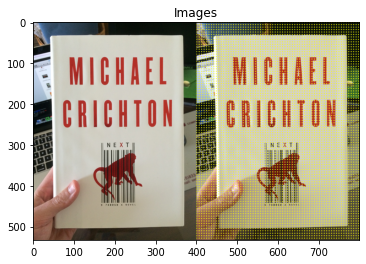

In [12]:
keypoint_detect(args["image"], args["step"], args["size"])

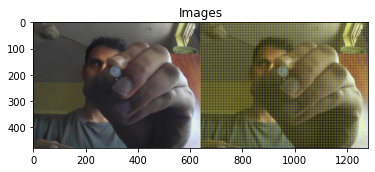

In [13]:
keypoint_detect(args["pen"], args["step"], args["size"])